## Part 1: Import Statements

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [29]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [30]:

#splitting the data into train, test data 0.8, 0.2
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [ ]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

In [31]:
X_train.sample(5)

5871     bitch cause police showed forcethey thing prev...
13412    nephew albino albinos astigmatisms eye spasms ...
11958    like cheese pizza youre pussy stay away lovely...
18560    recap epic storybook ending derek jeter closes...
24105                  bitch smokin gas could staa ferrari
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [32]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'august': 864,
 'alsina': 382,
 'deserved': 4249,
 'niggah': 11141,
 'grand': 6822,
 'opening': 11610,
 'top': 16909,
 'class': 3013,
 'oriental': 11661,
 'massage': 10081,
 'perfect': 12087,
 'hate': 7212,
 'bitches': 1559,
 'say': 14069,
 'aint': 266,
 'cute': 3863,
 'lol': 9653,
 'trynna': 17186,
 'hits': 7536,
 'blunt': 1741,
 'guy': 7018,
 'talk': 16264,
 'girls': 6601,
 'hoe': 7562,
 'hoes': 7581,
 'whats': 18201,
 'going': 6697,
 'pussies': 12914,
 'im': 8044,
 'asking': 754,
 'boy': 1928,
 'questions': 12996,
 'like': 9463,
 'bitch': 1545,
 'wan': 17956,
 'na': 10866,
 'nigga': 11134,
 'trinna': 17122,
 'savings': 14060,
 'account': 63,
 'omg': 11544,
 'imma': 8060,
 'funny': 6320,
 'ass': 764,
 'man': 9959,
 'thats': 16521,
 'real': 13201,
 'shit': 14553,
 'ignorant': 8004,
 'cement': 2626,
 'headed': 7271,
 'hillbilly': 7494,
 'said': 13960,
 'taxing': 16347,
 'cant': 2453,
 'fuckin': 6252,
 'read': 13193,
 'fucking': 6253,
 'knob': 9009,
 'gobbling': 6672,
 'douchebag': 468

Vocabulary of train and test set with respective counts

In [33]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [34]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization

In [35]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [36]:

def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [37]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 14738, 2: 3234, 0: 1120})
After Oversampling: Counter({1: 14738, 2: 14738, 0: 14738})


Oversampling TFIDF-Vectorized  training data

In [38]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 14738, 2: 3234, 0: 1120})
After Oversampling: Counter({1: 14738, 2: 14738, 0: 14738})


## Models

In [39]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## LinearSVC

## Count Vectorization

Linear SVC and data with CountVectorizations

In [40]:
# Initalising model
svc = LinearSVC(random_state= 424, max_iter = 20000)

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_test_count)


c:\miniconda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.23      0.40      0.29       249
   Offensive       0.93      0.89      0.91      3709
     Neither       0.82      0.83      0.83       815

    accuracy                           0.85      4773
   macro avg       0.66      0.71      0.68      4773
weighted avg       0.88      0.85      0.86      4773

The confusion matrix:
[[  99  297   27]
 [ 121 3294  111]
 [  29  118  677]]


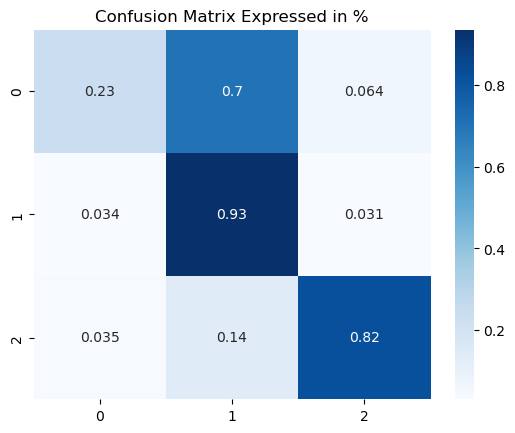

In [41]:
# output statistics
printModelStats(y_preds, y_test)

Gridsearch for optimization

In [42]:
# param_grid = {
#     "penalty":["l1", "l2"],
#     "C":[ 0.1, 1, 10],
#     "dual" : ["auto"] }

# svc = LinearSVC(random_state= 424, max_iter = 20000)

# grid_search_svc_count = GridSearchCV(svc, param_grid, cv = 5)
# grid_search_svc_count.fit(X_train_over_count, y_train_over_count)
# grid_search_svc_count.best_params_
    
# best_params_:{'C': 10, 'dual': 'auto', 'penalty': 'l1'}

SVM Model with best parameters for Count Vectorizations

In [43]:
# Initalising model
svc = LinearSVC(random_state= 424, C=10, penalty= 'l1', max_iter= 20000, dual = "auto")

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_test_count)


              precision    recall  f1-score   support

        Hate       0.20      0.35      0.26       249
   Offensive       0.91      0.89      0.90      3709
     Neither       0.81      0.75      0.78       815

    accuracy                           0.84      4773
   macro avg       0.64      0.66      0.65      4773
weighted avg       0.86      0.84      0.85      4773

The confusion matrix:
[[  86  307   27]
 [ 135 3285  173]
 [  28  117  615]]


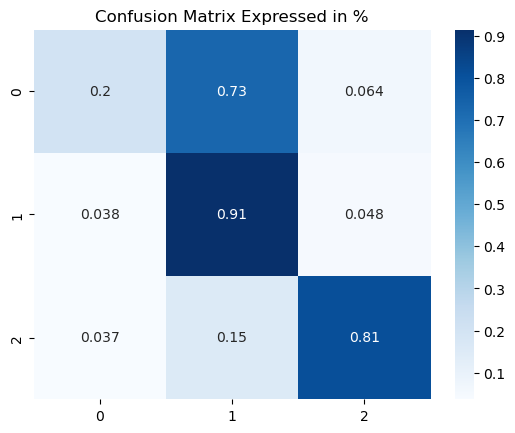

In [44]:
# output statistics
printModelStats(y_preds, y_test)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [45]:
# Initalising model
svc = LinearSVC(random_state = 424, max_iter = 10000)

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_test_tf)



c:\miniconda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.26      0.43      0.32       249
   Offensive       0.94      0.88      0.91      3709
     Neither       0.79      0.85      0.82       815

    accuracy                           0.85      4773
   macro avg       0.66      0.72      0.68      4773
weighted avg       0.88      0.85      0.86      4773

The confusion matrix:
[[ 108  292   23]
 [ 110 3263  100]
 [  31  154  692]]


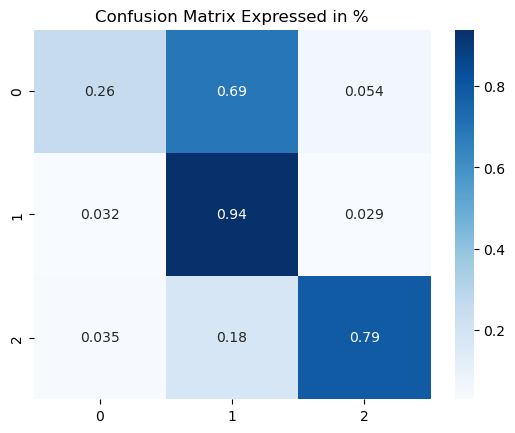

In [46]:
# output statistics
printModelStats(y_preds, y_test)

Grid Search for SVM with TFIDF

In [47]:
# param_grid = {
#     "penalty":["l1", "l2"],
#     "C":[ 0.1, 1, 10],
#     "dual" : ["auto"] }

# svc = LinearSVC(random_state= 424, max_iter = 20000)

# grid_search_svc_tf = GridSearchCV(svc, param_grid, cv = 5)
# grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
# grid_search_svc_tf.best_params_

# best params:  {'C': 10, 'dual': 'auto', 'penalty': 'l1'}

Optimal model

In [48]:
# Initalising model
svc = LinearSVC(random_state = 424, max_iter = 20000, penalty = "l1", C =10, dual = "auto")

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_test_tf)



              precision    recall  f1-score   support

        Hate       0.22      0.28      0.24       249
   Offensive       0.91      0.90      0.91      3709
     Neither       0.81      0.78      0.79       815

    accuracy                           0.85      4773
   macro avg       0.65      0.65      0.65      4773
weighted avg       0.86      0.85      0.85      4773

The confusion matrix:
[[  70  236   17]
 [ 152 3356  166]
 [  27  117  632]]


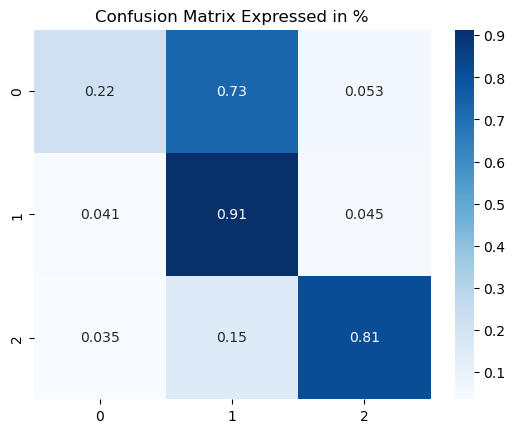

In [49]:
# output statistics
printModelStats(y_preds, y_test)